In [1]:
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

from keras import initializers
from keras import regularizers

from keras.layers import Dropout
from keras.optimizers import RMSprop, Adagrad, Adam
from keras.callbacks import EarlyStopping

from sklearn.model_selection import train_test_split

from sklearn.datasets import load_iris

Using TensorFlow backend.


In [27]:
iris = load_iris()
x = iris.data
y = iris.target
target_names = iris.target_names
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [5]:
#test_size = 0.2

X_train, X_test, y_train, y_test = train_test_split(
    x, y, random_state=10, test_size=0.2)

In [28]:
Y_train = np.eye(4)[y_train].astype(int)
Y_test = np.eye(4)[y_test].astype(int)

print(Y_train.shape, Y_test.shape)

(120, 4) (30, 4)


In [29]:
#model(Dense) with a initializer
in_dim=4
out_dim=3
h_dim=16

model=Sequential()
model.add(Dense(input_dim=in_dim,
                units=h_dim,
                kernel_initializer='TruncatedNormal'))

model.add(Dense(input_dim=in_dim,
                units=h_dim,
                kernel_initializer=initializers.truncated_normal(mean=0.0,stddev=0.05,seed=21),
                bias_initializer='zeros'))

model.add(Activation('sigmoid'))

model.add(Dense(units=out_dim,
                kernel_initializer=initializers.truncated_normal(mean=0.0,stddev=0.05,seed=52),
                bias_initializer='zeros'))
model.add(Activation('softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 16)                80        
_________________________________________________________________
dense_5 (Dense)              (None, 16)                272       
_________________________________________________________________
activation_4 (Activation)    (None, 16)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 3)                 51        
_________________________________________________________________
activation_5 (Activation)    (None, 3)                 0         
Total params: 403
Trainable params: 403
Non-trainable params: 0
_________________________________________________________________


In [15]:
#import pandas as pd
#import numpy as np
#import math
#df=pd.read_csv("A1.csv",sep=",",encoding='CP949')

In [17]:
#SGD(lr=0.01, momentum=0.0,decay=0.0, nesterov=False)
opt=SGD(lr=0.1)

model.compile(loss='categorical_crossentropy',optimizer=opt, metrics=['accuracy'])

In [18]:
#Checking weights befor training
# print(model.get_weights()[0])
# print(model.get_weights()[1])
# print(model.get_weights()[2])
# print(model.get_weights()[3])

In [19]:
#Training the Model(with a validation set)

#learing with both test and validation sets

n_epochs=100

hist=model.fit(X_train, Y_train, validation_split=0.25,epochs=n_epochs,verbose=0)

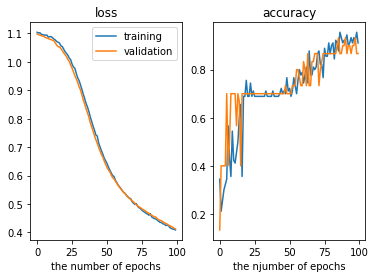

In [20]:
# print(hist.history.keys())

#-------------------------------------------------------------------

# graph for loss and accuracy

hist_loss = np.array(hist.history['loss'])
hist_loss_val = np.array(hist.history['val_loss'])

plt.subplot(121)
plt.plot(hist_loss, label='training')
plt.plot(hist_loss_val, label='validation')

plt.xlabel('the number of epochs')
plt.title('loss')
plt.legend()

# graph for accuracy

plt.subplot(122)
hist_acc = np.array(hist.history['acc'])
hist_acc_val = np.array(hist.history['val_acc'])

plt.plot(hist_acc, label='training')
plt.plot(hist_acc_val, label='validation')

plt.xlabel('the njumber of epochs')
plt.title('accuracy')

plt.show()

In [21]:
# evaluation

loss_train, acc_train = model.evaluate(X_train, Y_train, verbose=0)
loss_test, acc_test = model.evaluate(X_test, Y_test, verbose=0)

print("loss (train, test): \n ", loss_train, ',', loss_test)

print("accuracy (train, test): \n ", acc_train, ',', acc_test)

loss (train, test): 
  0.406288395325 , 0.458643049002
accuracy (train, test): 
  0.9 , 0.733333349228


In [22]:
classes_test = model.predict_classes(X_test, verbose=0)

print(classes_test)
print(y_test)

[2 2 0 2 0 1 2 1 0 2 2 2 2 0 0 2 1 0 0 0 2 2 2 0 1 0 1 2 2 2]
[1 2 0 1 0 1 1 1 0 1 1 2 1 0 0 2 1 0 0 0 2 2 2 0 1 0 1 1 1 2]


In [26]:
n_epochs=100
n_batch=32
hist=model.fit(X_train,Y_train,validation_split=0.25, epochs=n_epochs,batch_size=n_batch,verbose=0)

In [ ]:
df=df.as_matrix()
y=len(df)

In [ ]:
for i in range(y):
    if np.isnan(df[i,12]):
        df[i,12]=2000

In [ ]:
aa1=np.std(df[:,6])
bb1=np.std(df[:,7])
cc1=np.std(df[:,9])
dd1=np.std(df[:,10])

In [ ]:
#로그로 구할때 함수
def g(i,x1,x2,x3,x4):
    return (((math.log(x1)-math.log(df[i,6])))**2+((math.log(x2)-math.log(df[i,7])))**2+((math.log(x3)-math.log(df[i,9])))**2+((x4-df[i,10])/dd1)**2)**0.5

In [ ]:
#정규화한 거리로 구하는 함수
def g(i,a1,a2,a3,a4,x1,x2,x3,x4):
    return (a1*((x1-df[i,6])/aa1)**2+a2*((x2-df[i,7])/bb1)**2+a3*((x3-df[i,9])/cc1)**2+a4*((x4-df[i,10])/dd1)**2)**0.5

In [ ]:
#절대값으로 구한 함수
def g(i,x1,x2,x3,x4):
    return abs((x1-df[i,6])/aa1)+abs((x2-df[i,7])/bb1)+abs((x3-df[i,9])/cc1)+abs((x4-df[i,10])/dd1)

In [ ]:
c=np.arange(y)
c=c.astype(float)

for i in range(y):
    c[i]=g(i,64.0,200.0,10000,2010)
    
cc=c.reshape(y,1)
df1=np.hstack((df,cc))

In [ ]:
test1=pd.DataFrame(df1)
test1_1=test1.sort_values(by=13, axis=0, ascending=True, kind='quicksort', na_position='last')
test1_1.columns = ["도", "시군구", "읍면동","번지","주거유형","도로조건","대지면적","연면적","거래년월","거래가격","건축년도","도로명","그거","유사도"]

In [ ]:
print("조건\n","대지면적:",64.0,",연면적:",200.0,",거래가격:",10000,",건축년도:",2010)
test1_1.head()